# Early Stage Diabetes - Sylhet Diabetes Hospital in Sylhet, Bangladesh

*Audrey TISSOT*

dataset: https://www.kaggle.com/sujan97/early-stage-diabetes-2020

## *Goal: set a classifier to evaluate if a patient have diabete at an early stage using a questionary of symptoms.*

### Dataset description

#### Context
This has been collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh, and approved by a doctor.

#### Content
Since the data is the result of a set of questionnaires all features are in the form of Yes/No except Age, Sex and Class.

Age: 20-65
Sex: Male Female
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia
Obesity
Class: Positive, Negative

#### Acknowledgements
Courtesy: UCI Machine Learning Repository

**Source for this description: https://www.kaggle.com/sujan97/early-stage-diabetes-2020**

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Make a Pandas DataFrame from the CSV file

In [2]:
data = pd.read_csv('./diabetes_data_upload.csv')

In [3]:
data.columns #checking that the features are the sames than the ones in the dataset description

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [4]:
data = data.rename(columns={'class':'Diabetic'}) #I am afraid that, since 'class' is a keyword in python, it may be problematic later, so I renamed this feature.

In [5]:
data.sort_values('Age').head() #uncomment if you want to see the dataset. Visibly we don't have NaN values, but just in case we will clean the dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetic
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive
68,25,Female,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,Positive
108,25,Male,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Positive
235,26,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
286,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [6]:
diabete_total_count = data.groupby(['Diabetic']).count()
diabete_total_count

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
Diabetic,,,,,,,,,,,,,,,,
Negative,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
Positive,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320


## Data Cleaning

In [7]:
before_rows = data.shape[0] 
print(before_rows)
data = data.dropna()
after_rows = data.shape[0]
print(after_rows)

520
520


Since the number of raws is the same before and after cleaning, we had no NaN values.

### Binarization

The answers to the questionary are "yes" and "no". It will be easier to analyse if we change it respectively by True and False. I will also binarize the gender of the participants: True for Male, False for Female, their diagnose: True if Positive, False if Negative and their ages: True if they are quite old (limit to be determined), False otherwise,.

In [8]:
bin_data = data.copy()

#### Diabetic: Positive/Negative => True/False

In [9]:
bin_data['Diabetic'] = (bin_data['Diabetic'] == "Positive")
bin_data.sort_values('Age').head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetic
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,True
68,25,Female,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,True
108,25,Male,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,True
235,26,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False
286,27,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False


#### Gender

In [10]:
bin_data['Gender'] = (bin_data['Gender'] == 'Male')
bin_data.sort_values('Age').head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetic
133,16,True,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,True
68,25,False,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,True
108,25,True,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,True
235,26,True,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False
286,27,True,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False


#### Yes/No => True/False

In [11]:
featuresYN = ['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [12]:
bin_data[featuresYN] = (bin_data[featuresYN] == 'Yes')
bin_data.sort_values('Age').head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetic
133,16,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True
68,25,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,True
108,25,True,True,True,False,False,True,True,True,True,False,True,False,False,True,False,True
235,26,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
286,27,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Age

In [13]:
bin_data_age = bin_data.copy()

Cutoff age chosen according to this article: 
**Early onset type 2 diabetes: risk factors, clinical impact and management**; E. Wilmot and I.Idris; *Ther Adv Chronic Dis.* 2014 Nov; 5(6): 234–244.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4205573/

In [14]:
bin_data_age['Age'] = (bin_data_age['Age'] <= 45)
bin_data_age.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetic
0,True,True,False,True,False,True,False,False,False,True,False,True,False,True,True,True,True
1,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True
2,True,True,True,False,False,True,True,False,False,True,False,True,False,True,True,False,True
3,True,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,True
4,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True


## Exploration (non visual)

### Age

#### Diabetic and non diabetic patients' statistics

In [15]:
bin_data.describe() #all patients description

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [16]:
diabete_total_count = bin_data.groupby(['Diabetic']).count()
diabete_total_count

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
Diabetic,,,,,,,,,,,,,,,,
False,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
True,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320


#### Non Diabetic patients' statistics

In [18]:
BDO = bin_data.copy() #patients with diabete
indexNotSicks = BDO[BDO['Diabetic'] == True ].index #inverted non intuitive condition
BDO.drop(indexNotSicks , inplace=True)
BDO.describe()

,Age
count,200.000000
mean,46.360000
std,12.080983
min,26.000000
25%,37.000000
50%,45.000000
75%,55.000000
max,72.000000


#### Diabetic patients' statistics

In [19]:
BDD = bin_data.copy() #patients OK (no diabete)
indexSicks = BDD[ BDD['Diabetic'] == False ].index
BDD.drop(indexSicks , inplace=True)
BDD.describe()

,Age
count,320.000000
mean,49.071875
std,12.097481
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,90.000000


This dataset have 1.6 times more diabetic patients than diabetic ones (320 diabetics, 200 non diabetics). It still reresent a lot of diabete frequency. However, since the dataset emanates from a hospital specilized in diabetes, it appears normal.

Descriptives age statistics for general, diabetic and non-diabetic studied population are quite similar, especialy the mean. We can notice that this mean is close to the cutoff number chosen by Wilmot and Idris (45 yo.).

## Building the model

We will use the Decision Tree model, because it is easy to use, efficiant and consume few ressources.

### Separation features/class and train/test split

In [20]:
patient_features = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [21]:
X = bin_data_age[patient_features].copy()

In [22]:
y = bin_data_age['Diabetic'].copy()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

### Training Decision Tree classifier

In [24]:
diabete_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
diabete_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
predictions = diabete_classifier.predict(X_test)

In [26]:
AccuracyMLN10RS0 = accuracy_score(y_true = y_test, y_pred = predictions)
AccuracyMLN10RS0

0.9302325581395349

We obtained a Decision Tree classifier able to determine if a patient have diabete according to her-is symptoms with a 93% accuracy using the parameters max_leaf_nodes=10 and random_state=0. We will now try to improve this accuracy.

### Amelioration of accuracy

In [27]:
Accuracies = []
for i in np.arange(2,30):
    diabete_classifier = DecisionTreeClassifier(max_leaf_nodes=i, random_state=0)
    diabete_classifier.fit(X_train, y_train)
    predictions = diabete_classifier.predict(X_test)
    AccuracyMLNiR0 = accuracy_score(y_true = y_test, y_pred = predictions)*100
    Accuracies.append(AccuracyMLNiR0)
    

We can see that we reach a kind of plateau in accuracy with a maximum leaf nodes of of 19.

Text(0, 0.5, 'Accuracy (%)')

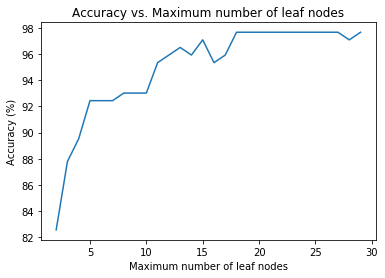

In [28]:
%matplotlib inline
plt.plot(np.arange(2,30),Accuracies)
plt.title('Accuracy vs. Maximum number of leaf nodes')
plt.xlabel('Maximum number of leaf nodes')
plt.ylabel('Accuracy (%)')

In [29]:
diabete_classifier = DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)
diabete_classifier.fit(X_train, y_train)
predictions4 = diabete_classifier.predict(X_test)
AccuracyMLN19R0 = accuracy_score(y_true = y_test, y_pred = predictions)*100
AccuracyMLN19R0

97.67441860465115

We can see that we can reach a 97% accuracy model to diagnose early diabete with this decision tree classifier using a maximum of 19 leaf nodes.

In [30]:
diabete_classifier2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
diabete_classifier2.fit(X_train, y_train)
pred = diabete_classifier2.predict(X_test)
AccuracyMLN6R0 = accuracy_score(y_true = y_test, y_pred = pred)
AccuracyMLN6R0

0.9244186046511628

To avoid over fitting, we can privilegiate the value at the elbow of the curve: here a maximum of 5 leaf nodes, giving a 92% accuracy.